<a href="https://colab.research.google.com/github/Chinmayee-Codes/CV/blob/main/Bottle_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
ipythonx_mvtec_ad_path = kagglehub.dataset_download('ipythonx/mvtec-ad')

print('Data source import complete.')


100%|██████████| 4.91G/4.91G [00:55<00:00, 94.8MB/s]

Extracting files...


Data source import complete.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bottle Anomalies Autoencoder

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os
import cv2
import random

# Training data of 1 class and Test data of several classes


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224,224)), # Unify images to (224,224) size
    transforms.ToTensor()
])

train_dir='/content/drive/MyDrive/bottle/train'
test_dir='/content/drive/MyDrive/bottle/test'

train_dataset = ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
class_names = test_dataset.classes

print(class_names)
print(len(train_dataset),len(test_dataset))

['broken_large', 'broken_small', 'contamination', 'good']
209 83


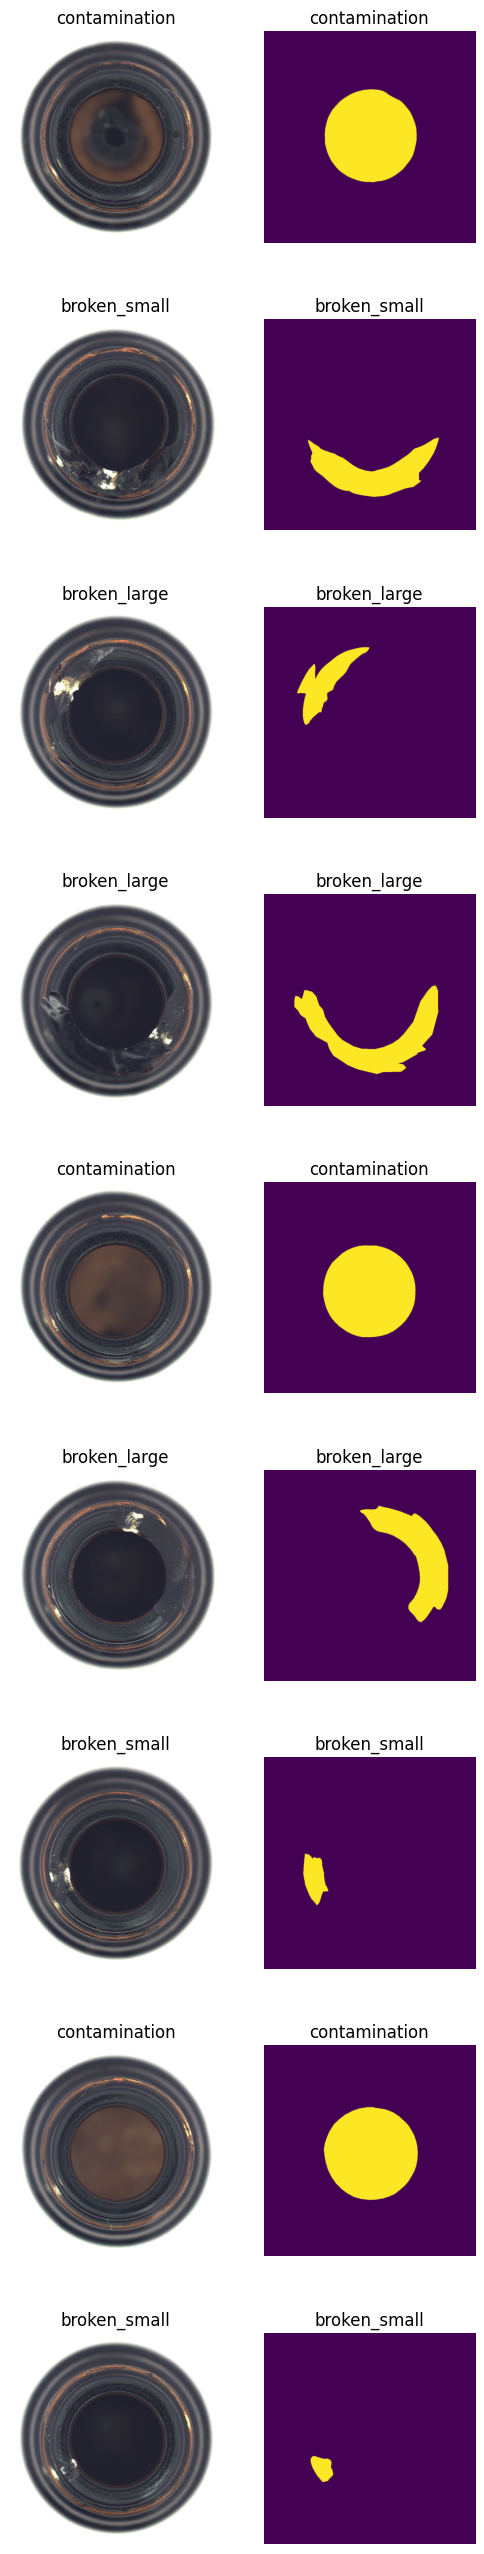

In [ ]:
paths=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/bottle/test'):
    for filename in filenames:
        if dirname.split('/')[-1]!='good' and filename[2] in list('01234'):
            paths+=[(os.path.join(dirname, filename))]
paths=random.sample(paths,9)

dir0='/content/drive/MyDrive/bottle/ground_truth'

fig, axs = plt.subplots(9,2,figsize=(6,33))
for i in range(9):
    r=i

    path=paths[i]
    img = plt.imread(path)
    label=path.split('/')[-2]
    ax=axs[r][0].axis("off")
    ax=axs[r][0].set_title(label)
    ax=axs[r][0].imshow(img)

    path=paths[i]
    file=path.split('/')[-1].split('.')[0]+'_mask.png'
    label=path.split('/')[-2]
    path2=os.path.join(dir0,label,file)
    img = plt.imread(path2)
    ax=axs[r][1].axis("off")
    ax=axs[r][1].set_title(label)
    ax=axs[r][1].imshow(img)

plt.show()

In [ ]:
# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 8, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Instantiate Autoencoder and send to GPU
autoencoder = Autoencoder().to(device)

# Definition of loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

## Training the autoencoder


In [ ]:
# training
for epoch in range(100):
    running_loss = 0.0
    for data in train_loader:
        img, _ = data
        img = Variable(img).to(device)
        optimizer.zero_grad()
        outputs = autoencoder(img)
        loss = criterion(outputs, img)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('Epoch [%d], Loss: %.4f' % (epoch+1, running_loss/len(train_loader)))

Epoch [1], Loss: 0.3407
Epoch [2], Loss: 0.3159
Epoch [3], Loss: 0.2380
Epoch [4], Loss: 0.1842
Epoch [5], Loss: 0.1324
Epoch [6], Loss: 0.0859
Epoch [7], Loss: 0.0585
Epoch [8], Loss: 0.0330
Epoch [9], Loss: 0.0257
Epoch [10], Loss: 0.0217
Epoch [11], Loss: 0.0197
Epoch [12], Loss: 0.0184
Epoch [13], Loss: 0.0171
Epoch [14], Loss: 0.0158
Epoch [15], Loss: 0.0144
Epoch [16], Loss: 0.0133
Epoch [17], Loss: 0.0124
Epoch [18], Loss: 0.0116
Epoch [19], Loss: 0.0110
Epoch [20], Loss: 0.0102
Epoch [21], Loss: 0.0097
Epoch [22], Loss: 0.0092
Epoch [23], Loss: 0.0087
Epoch [24], Loss: 0.0082
Epoch [25], Loss: 0.0078
Epoch [26], Loss: 0.0074
Epoch [27], Loss: 0.0071
Epoch [28], Loss: 0.0069
Epoch [29], Loss: 0.0066
Epoch [30], Loss: 0.0064
Epoch [31], Loss: 0.0062
Epoch [32], Loss: 0.0060
Epoch [33], Loss: 0.0058
Epoch [34], Loss: 0.0056
Epoch [35], Loss: 0.0055
Epoch [36], Loss: 0.0054
Epoch [37], Loss: 0.0053
Epoch [38], Loss: 0.0051
Epoch [39], Loss: 0.0050
Epoch [40], Loss: 0.0049
Epoch [41

In [ ]:
# Testing
from sklearn.metrics import classification_report
autoencoder.eval()
for criteria in [0.001,0.003,0.01,0.03,0.1]:
    y_pred=[]
    y_true=[]
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            img, label = data
            img = Variable(img).to(device)
            outputs = autoencoder(img)
            loss = criterion(outputs, img)
            test_loss += loss.item()
            for i in range(len(img)):
                lossi=criterion(outputs[i], img[i])
                y_pred+=[int(lossi.item()>criteria)] #ture(big loss)=1,false(smsll loss)=0
                y_true+=[int(label[i]>0)] #ture(not notmal)=1,false(normal)=0
    print('test_loss',test_loss)
    print('criteria: lossi.item()>',criteria)
    print(classification_report(y_true, y_pred, target_names=['Normal','Abnormal'], digits=4))

test_loss 0.017401404213160276
criteria: lossi.item()> 0.001
              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000        20
    Abnormal     0.7590    1.0000    0.8630        63

    accuracy                         0.7590        83
   macro avg     0.3795    0.5000    0.4315        83
weighted avg     0.5761    0.7590    0.6551        83



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_loss 0.017401403980329633
criteria: lossi.item()> 0.003
              precision    recall  f1-score   support

      Normal     0.3148    0.8500    0.4595        20
    Abnormal     0.8966    0.4127    0.5652        63

    accuracy                         0.5181        83
   macro avg     0.6057    0.6313    0.5123        83
weighted avg     0.7564    0.5181    0.5397        83

test_loss 0.017401404213160276
criteria: lossi.item()> 0.01
              precision    recall  f1-score   support

      Normal     0.2410    1.0000    0.3883        20
    Abnormal     0.0000    0.0000    0.0000        63

    accuracy                         0.2410        83
   macro avg     0.1205    0.5000    0.1942        83
weighted avg     0.0581    0.2410    0.0936        83



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_loss 0.01740140374749899
criteria: lossi.item()> 0.03
              precision    recall  f1-score   support

      Normal     0.2410    1.0000    0.3883        20
    Abnormal     0.0000    0.0000    0.0000        63

    accuracy                         0.2410        83
   macro avg     0.1205    0.5000    0.1942        83
weighted avg     0.0581    0.2410    0.0936        83



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_loss 0.01740140374749899
criteria: lossi.item()> 0.1
              precision    recall  f1-score   support

      Normal     0.2410    1.0000    0.3883        20
    Abnormal     0.0000    0.0000    0.0000        63

    accuracy                         0.2410        83
   macro avg     0.1205    0.5000    0.1942        83
weighted avg     0.0581    0.2410    0.0936        83



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# comparing classes in test data
autoencoder.eval()
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_encodings = [[] for i in range(6)]
with torch.no_grad():
    for data in test_loader:
        img, label = data
        img = Variable(img).to(device)
        encoding = autoencoder.encoder(img)
        class_encodings[label.item()].append(encoding.cpu().numpy().ravel())

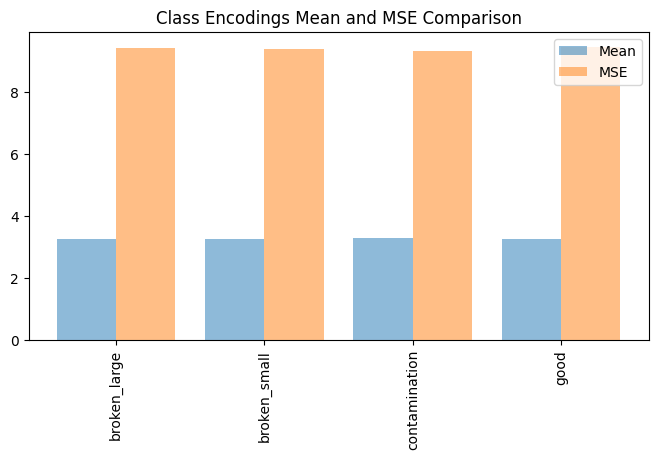

In [ ]:
class_means = []
class_mses = []
for i in range(4):
    class_means.append(np.mean(class_encodings[i]))
    class_mse = np.mean((class_encodings[i] - class_means[i])**2)
    class_mses.append(class_mse)

plt.figure(figsize=(8,4))
plt.bar(np.arange(4)-0.2, class_means, width=0.4, label='Mean', alpha=0.5)
plt.bar(np.arange(4)+0.2, class_mses, width=0.4, label='MSE', alpha=0.5)
plt.xticks(range(4), class_names, rotation=90)
plt.legend()
plt.title("Class Encodings Mean and MSE Comparison")
plt.show()